Couple First Order Equations ODEs

Second Order ODE's method to discunstruct to first Order ODE's

    

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

In [2]:
def dSdx(x, S):
    y1, y2 = S
    return [y1 + y2**2 + 3*x,
            3*y1 + y2**3 - np.cos(x)]
y1_0 = 0
y2_0 = 0
S_0 = ((y1_0, y2_0))


Solve the ODE

In [3]:
x = np.linspace(0, 1, 100)
sol = odeint(dSdx, y0= S_0, t=x, tfirst=True)

Get y1 and y2 from the solution

In [4]:
y1_sol = sol.T[0]
y2_sol = sol.T[1]

Plot!

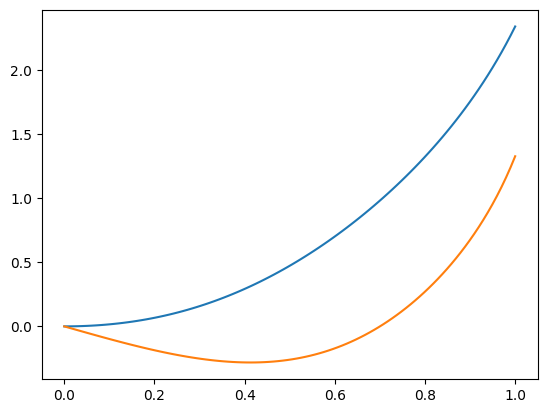

In [5]:
plt.plot(x, y1_sol)
plt.plot(x, y2_sol)


Solving Second Order ODE's by splitting into 2 First Order ODE's


In [6]:
def dSdx(x, S):
    x, v = S
    return [v,
            -v**2 + np.sin(x)]
x_0 = 0
v_0 = 5
S_0 = (x_0, v_0)



In [7]:
t = np.linspace(0, 1, 100)
sol = odeint(dSdx, y0=S_0, t=t, tfirst=True)


In [8]:
x_sol = sol.T[0]
v_sol = sol.T[0]


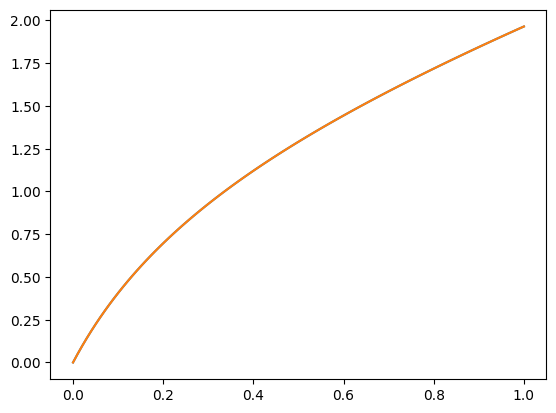

In [9]:
plt.plot(t, x_sol)
plt.plot(t, v_sol)

This process can be repeated for third order (requires defining two new variables)

In [15]:
def dSdt(t, S):
    x1, v1, a1, x2, v2, a2 = S
    return [v1,
            a1,
            -2*v2**2 + x2,
            v2,
            a2,
            -a1**3 + v2 + v1 + np.sin(t)]
x1_0 = 0
v1_0 = 0
a1_0 = 0
x2_0 = 0
v2_0 = 0
a2_0 = 0
v_0 = 0
S_0 = (x1_0,v1_0,a1_0,x1_0,v1_0,a1_0)


In [16]:
t = np.linspace(0, 1, 100)
sol = odeint(dSdt, y0=S_0, t=t, tfirst=True)

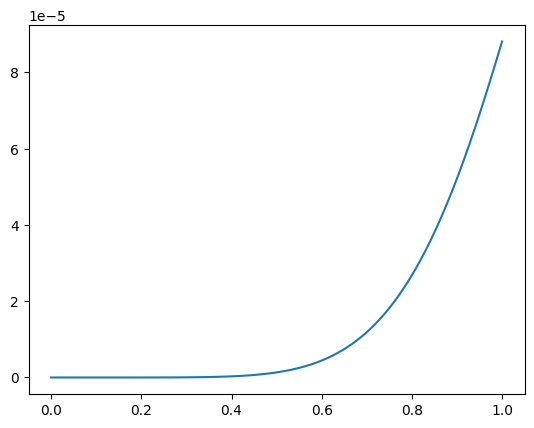

In [18]:
plt.plot(t,sol.T[0])

A Final Note: Be Careful
Not all solvers work for all ODEs. For example, the ODEs for 3 body motion

Require the DOP853 solver with low values for rtol and atol to solve

https://arxiv.org/pdf/1709.04775.pdf
Always review the literature on your specific ODE to find an appropriate solver. In addition, play around with the parameters rtol and atol to ensure you get a proper solution